# Extracting Song Data from the Spotify API

## Requirements

In [4]:
# pip install spotipy
import pandas as pd
from spotipy import Spotify
from spotipy.oauth2 import SpotifyClientCredentials
from config import myAPIKeys  # config file with credentials

## Authentication

In [5]:
client_credentials_manager = SpotifyClientCredentials(client_id=myAPIKeys()[0], client_secret=myAPIKeys()[1])
sp = Spotify(client_credentials_manager=client_credentials_manager)

## Extracting Tracks and Features from Playlists

In [6]:
playlist_link = "https://open.spotify.com/playlist/37i9dQZEVXbNG2KDcFcKOF?si=1333723a6eff4b7f"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]

In [7]:
d_tracks = {
     'track_name': [],
     'position': [],
     'artist_name': [],
     'artist_popularity': [],
     'artist_genre': [],
     'track_album': [],
     'track_popularity': [],
     'danceability': [],
     'energy': [],
     'loudness': [],
     'speechiness': [],
     'acousticness': [],
     'valence': [],
     'instrumentalness': [],
     'liveness': [],
     'tempo': [],
     'duration_ms': []
}

In [8]:
for i, track in enumerate(sp.playlist_tracks(playlist_URI)['items']):
     track_info = track['track']
     artist_info = sp.artist(track_info['artists'][0]['uri'])
     feature_info = sp.audio_features(track_info['uri'])[0]
     d_tracks['track_name'].append(track_info['name'])
     d_tracks['position'].append(i+1)
     d_tracks['artist_name'].append(track_info['artists'][0]['name'])
     d_tracks['artist_popularity'].append(artist_info['popularity'])
     d_tracks['artist_genre'].append(artist_info['genres'])
     d_tracks['track_album'].append(track_info['album']['name'])
     d_tracks['track_popularity'].append(track_info['popularity'])
     d_tracks['danceability'].append(feature_info['danceability'])
     d_tracks['energy'].append(feature_info['energy'])
     d_tracks['loudness'].append(feature_info['loudness'])
     d_tracks['speechiness'].append(feature_info['speechiness'])
     d_tracks['acousticness'].append(feature_info['acousticness'])
     d_tracks['valence'].append(feature_info['valence'])
     d_tracks['instrumentalness'].append(feature_info['instrumentalness'])
     d_tracks['liveness'].append(feature_info['liveness'])
     d_tracks['tempo'].append(feature_info['tempo'])
     d_tracks['duration_ms'].append(feature_info['duration_ms'])

In [9]:
df_tracks = pd.DataFrame.from_dict(d_tracks)
df_tracks

,track_name,position,artist_name,artist_popularity,artist_genre,track_album,track_popularity,danceability,energy,loudness,speechiness,acousticness,valence,instrumentalness,liveness,tempo,duration_ms
0,abcdefu,1,GAYLE,82,[],abcdefu,97,0.695,0.540,-5.692,0.0493,0.29900,0.4150,0.000000,0.3670,121.932,168602
1,STAY (with Justin Bieber),2,The Kid LAROI,90,[australian hip hop],F*CK LOVE 3: OVER YOU,93,0.591,0.764,-5.484,0.0483,0.03830,0.4780,0.000000,0.1030,169.928,141806
2,All I Want for Christmas Is You,3,Mariah Carey,87,"[dance pop, pop, urban contemporary]",Merry Christmas,97,0.336,0.627,-7.463,0.0384,0.16400,0.3500,0.000000,0.0708,150.273,241107
3,Easy On Me,4,Adele,96,"[british soul, pop, pop soul, uk pop]",30,92,0.604,0.366,-7.519,0.0282,0.57800,0.1300,0.000000,0.1330,141.981,224695
4,INDUSTRY BABY (feat. Jack Harlow),5,Lil Nas X,91,"[lgbtq+ hip hop, pop]",MONTERO,91,0.741,0.691,-7.395,0.0672,0.02210,0.8920,0.000000,0.0476,150.087,212353
5,Last Christmas,6,Wham!,81,"[europop, new romantic, new wave, new wave pop...",LAST CHRISTMAS,93,0.735,0.478,-12.472,0.0293,0.18900,0.9470,0.000002,0.3550,107.682,262960
6,Heat Waves,7,Glass Animals,86,"[gauze pop, indietronica, shiver pop]",Dreamland (+ Bonus Levels),93,0.761,0.525,-6.900,0.0944,0.44000,0.5310,0.000007,0.0921,80.870,238805
7,Enemy (with JID) - from the series Arcane Leag...,8,Imagine Dragons,91,"[modern rock, rock]",Enemy (with JID) [from the series Arcane Leagu...,97,0.728,0.783,-4.424,0.2660,0.23700,0.5550,0.000000,0.4340,77.011,173381
8,Cold Heart - PNAU Remix,9,Elton John,89,"[glam rock, mellow gold, piano rock]",The Lockdown Sessions,88,0.795,0.800,-6.320,0.0309,0.03540,0.9340,0.000073,0.0915,116.032,202735
9,Rockin' Around The Christmas Tree,10,Brenda Lee,79,"[adult standards, brill building pop, vocal jazz]",Merry Christmas From Brenda Lee,94,0.589,0.472,-8.749,0.0502,0.61400,0.8980,0.000000,0.5050,67.196,126267


## EDA

### Requirements

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Data Visualization & Data Analysis

In [11]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   track_name         50 non-null     object 
 1   position           50 non-null     int64  
 2   artist_name        50 non-null     object 
 3   artist_popularity  50 non-null     int64  
 4   artist_genre       50 non-null     object 
 5   track_album        50 non-null     object 
 6   track_popularity   50 non-null     int64  
 7   danceability       50 non-null     float64
 8   energy             50 non-null     float64
 9   loudness           50 non-null     float64
 10  speechiness        50 non-null     float64
 11  acousticness       50 non-null     float64
 12  valence            50 non-null     float64
 13  instrumentalness   50 non-null     float64
 14  liveness           50 non-null     float64
 15  tempo              50 non-null     float64
 16  duration_ms        50 non-nu

In [12]:
df_tracks.describe()

,position,artist_popularity,track_popularity,danceability,energy,loudness,speechiness,acousticness,valence,instrumentalness,liveness,tempo,duration_ms
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000
mean,25.50000,87.980000,90.320000,0.614780,0.599080,-7.338400,0.072592,0.344942,0.561838,0.010187,0.188706,131.44260,202910.480000
std,14.57738,6.677681,6.025253,0.146979,0.184737,2.949018,0.067054,0.286099,0.240713,0.051741,0.130653,32.73248,71745.428608
min,1.00000,75.000000,74.000000,0.234000,0.158000,-16.485000,0.028200,0.001300,0.084900,0.000000,0.026400,67.19600,117147.000000
25%,13.25000,83.250000,88.250000,0.530250,0.505250,-8.736000,0.036600,0.089425,0.400000,0.000000,0.090150,106.94775,168321.500000
50%,25.50000,89.500000,93.000000,0.635000,0.624000,-6.812500,0.046350,0.287000,0.543500,0.000000,0.128000,130.27200,201387.500000
75%,37.75000,94.000000,94.000000,0.727750,0.757750,-5.142500,0.077225,0.504750,0.763250,0.000026,0.313000,151.00650,225899.000000
max,50.00000,100.000000,97.000000,0.854000,0.893000,-2.724000,0.363000,0.912000,0.967000,0.353000,0.505000,201.73900,613027.000000


In [8]:
df_data = df_tracks.copy().set_index('position')
df_data = df_data[['artist_popularity', 'track_popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'valence', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']]

In [9]:
# Normalizing data for heatmap
scaler = StandardScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df_data), columns=df_data.columns, index=df_data.index)
df_scale

,artist_popularity,track_popularity,danceability,energy,speechiness,acousticness,valence,instrumentalness,liveness,tempo,duration_ms
position,,,,,,,,,,,
1,-0.904612,1.119923,0.551334,-0.323053,-0.350889,-0.162212,-0.616206,-0.198879,1.378494,-0.293505,-0.483052
2,0.305571,0.449310,-0.163435,0.901791,-0.365954,-1.082686,-0.351826,-0.198879,-0.662643,1.187693,-0.860331
3,-0.148247,1.119923,-1.915994,0.152668,-0.515096,-0.638867,-0.888979,-0.198879,-0.911600,0.581122,0.537795
4,1.213209,0.281657,-0.074089,-1.274494,-0.668757,0.822875,-1.812209,-0.198879,-0.430695,0.325224,0.306719
5,0.456844,0.114004,0.867482,0.502623,-0.081229,-1.139885,1.385526,-0.198879,-1.090972,0.575382,0.132948
6,-1.055885,0.449310,0.826246,-0.662072,-0.652185,-0.550598,1.616333,-0.198831,1.285715,-0.733273,0.845478
7,-0.299520,0.449310,1.004938,-0.405073,0.328533,0.335627,-0.129412,-0.198748,-0.746917,-1.560714,0.505383
8,0.456844,1.119923,0.778136,1.005684,2.913653,-0.381121,-0.028696,-0.198879,1.896510,-1.679806,-0.415766
9,0.154298,-0.388955,1.238613,1.098641,-0.628082,-1.092925,1.561779,-0.197464,-0.751556,-0.475584,-0.002471


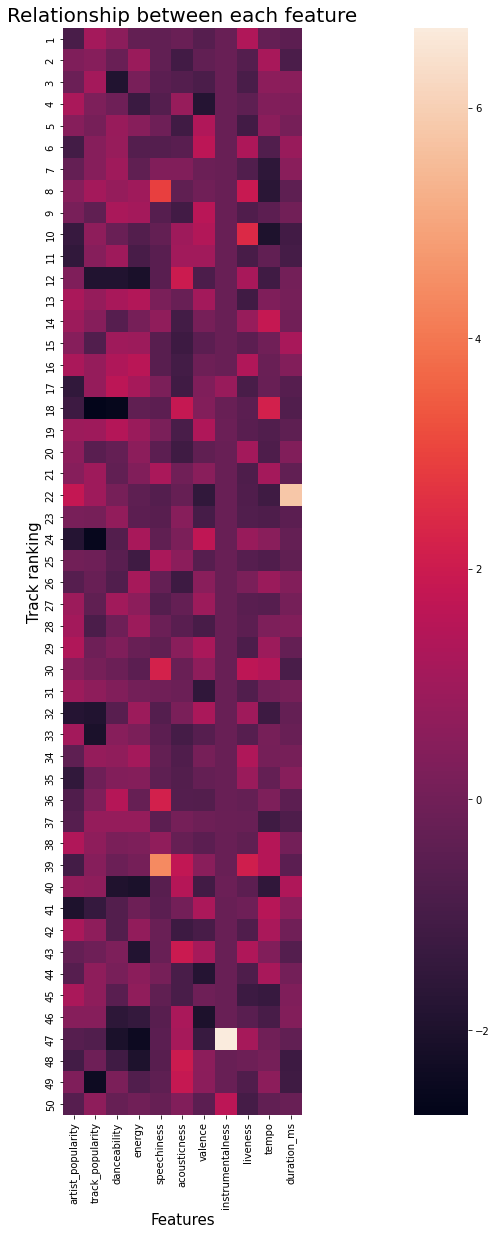

In [10]:
plt.figure(figsize = (40, 20))
sn.heatmap(df_scale, square=True)
plt.title('Relationship between each feature', fontsize=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Track ranking', fontsize=15)
plt.show()